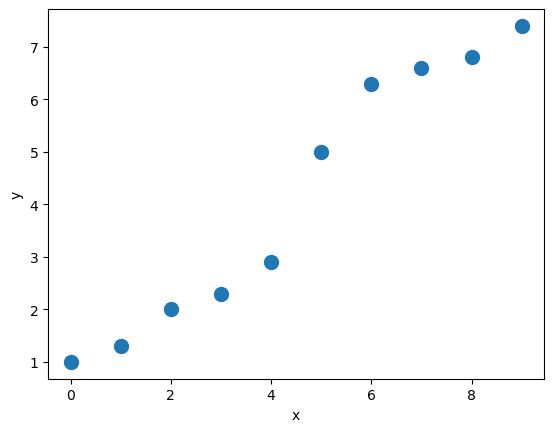

In [1]:
import numpy as np
import sklearn
import torch
import matplotlib.pyplot as plt
x_train = np.arange(10, dtype=np.float32).reshape((10, 1))
y_train = np.array([1.0, 1.3, 2.0, 2.3, 2.9, 5.0, 6.3, 6.6, 6.8, 7.4], dtype = np.float32)
plt.figure(1)
plt.plot(x_train, y_train, 'o', markersize = 10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [2]:
from torch.utils.data import TensorDataset, DataLoader
x_train_norm = (x_train - np.mean(x_train)) / np.std(x_train)
x_train_norm = torch.from_numpy(x_train_norm)
y_train_1 = torch.from_numpy(y_train).float()
train_ds = TensorDataset(x_train_norm, y_train_1)
batch_size = 1
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

Epoch 0   Loss 4.7254
Epoch 10   Loss 14.6662
Epoch 20   Loss 3.7697
Epoch 30   Loss 5.8258
Epoch 40   Loss 0.0322
Epoch 50   Loss 3.4743
Epoch 60   Loss 0.2920
Epoch 70   Loss 4.5963
Epoch 80   Loss 2.6219
Epoch 90   Loss 0.0474
Epoch 100   Loss 0.0682
Epoch 110   Loss 0.0181
Epoch 120   Loss 0.5581
Epoch 130   Loss 0.0028
Epoch 140   Loss 0.0149
Epoch 150   Loss 0.0080
Epoch 160   Loss 0.2989
Epoch 170   Loss 0.4170
Epoch 180   Loss 0.8643
Epoch 190   Loss 0.1012


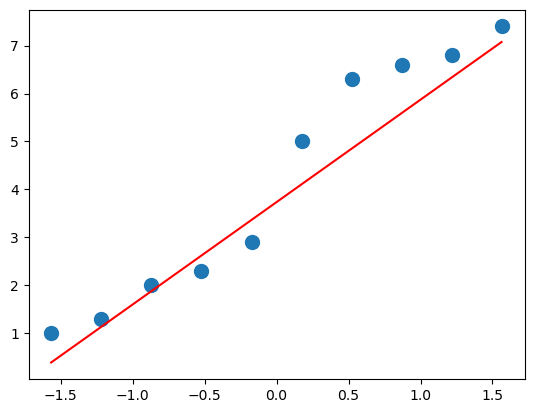

In [3]:
weight = torch.rand(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad = True)
def model(xb):
    return xb@weight + bias
def loss_fn(input, target):
    return (input-target).pow(2).mean()
learning_rate = 0.001
num_epochs = 200
log_epochs = 10
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch.long())
        loss.backward()
    with torch.no_grad():
        weight -= weight.grad * learning_rate
        bias -= bias.grad * learning_rate
        weight.grad.zero_()
        bias.grad.zero_()
    if epoch % log_epochs == 0:
        print(f'Epoch {epoch}   Loss {loss.item():.4f}')
xaxis = torch.from_numpy(np.arange(x_train_norm.min(), x_train_norm.max(), 0.01, dtype=np.float32).reshape(-1, 1))
plt.plot(x_train_norm, y_train_1, 'o', markersize = 10)
plt.plot(xaxis, model(xaxis).detach().numpy(), 'r')

In [6]:
import torch.nn as nn
loss_fn = nn.MSELoss(reduction='mean')
input_size, output_size = 1, 1
model = nn.Linear(input_size, output_size)
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

Epoch 0   Loss 0.0346
Epoch 10   Loss 0.1560
Epoch 20   Loss 0.8679
Epoch 30   Loss 0.7365
Epoch 40   Loss 0.1912
Epoch 50   Loss 0.0204
Epoch 60   Loss 0.1560
Epoch 70   Loss 0.0346
Epoch 80   Loss 0.7364
Epoch 90   Loss 0.1560
Epoch 100   Loss 0.8679
Epoch 110   Loss 0.1561
Epoch 120   Loss 0.4237
Epoch 130   Loss 0.8678
Epoch 140   Loss 0.0346
Epoch 150   Loss 0.1560
Epoch 160   Loss 0.0346
Epoch 170   Loss 0.2260
Epoch 180   Loss 0.0012
Epoch 190   Loss 0.0346


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

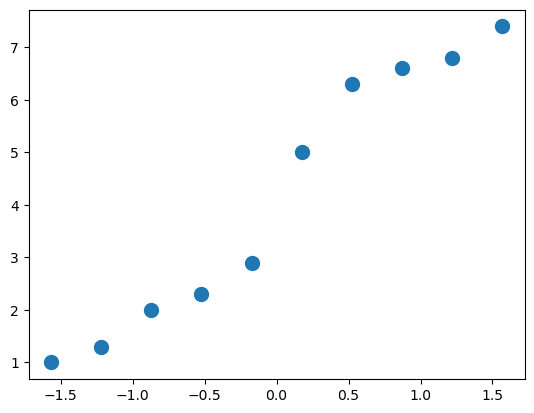

In [10]:
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)[:, 0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
    # with torch.no_grad():
        optimizer.step()
        optimizer.zero_grad()
    if epoch % log_epochs == 0:
        print(f'Epoch {epoch}   Loss {loss.item():.4f}')
xaxis = torch.from_numpy(np.arange(x_train_norm.min(), x_train_norm.max(), 0.01, dtype=np.float32).reshape(-1, 1))
plt.plot(x_train_norm, y_train_1, 'o', markersize = 10)
plt.plot(xaxis, model(xaxis).detach().numpy(), 'r')
print(f'Final Parameters: model.weight.item(), model.bias.item()')